Лабораторная работа 6 Журавлев К. В.

**Задание 1**

Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).

**Задание 2**

Загрузите датасет из приложения. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [ ]:
X = pd.read_csv('23_x.csv', names=['x1','x2','x3','x4'])
Y = pd.read_csv('23_y.csv', names = ['Y'])

In [ ]:
X.head()

,x1,x2,x3,x4
0,1.608597,-0.240225,-2.733029,-0.942902
1,1.561250,1.214764,-0.420337,0.904731
2,-0.689647,0.839155,0.053913,1.080616
3,-0.723776,0.644074,-0.178414,-0.182270
4,0.046613,-0.789580,-1.470952,-0.574737


In [ ]:
Y.head()

,Y
0,-238.836507
1,145.210299
2,157.208052
3,42.603559
4,-212.302374


**Задание 3**

Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.

In [ ]:
print(X.shape, X.describe(), sep = '\n')

(374, 4)
               x1          x2          x3          x4
count  374.000000  374.000000  374.000000  374.000000
mean     0.022809    0.052122   -0.047351   -0.009339
std      1.060930    0.987249    0.930535    0.963406
min     -3.517654   -2.243863   -2.733029   -2.672787
25%     -0.672719   -0.638758   -0.700923   -0.710718
50%     -0.032406    0.026829   -0.024443    0.028487
75%      0.631828    0.639133    0.544270    0.707798
max      3.277544    3.130895    3.270491    2.567770


In [ ]:
print(Y.shape, Y.describe(), sep = '\n')

(374, 1)
                Y
count  374.000000
mean     1.561142
std    124.707930
min   -304.284754
25%    -80.610959
50%     -4.153379
75%     81.309929
max    402.484527


**Задание 4**

Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

**Задание 5**

Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

In [ ]:
def r2Score(column_name : str) -> None:
    
    y = LinearRegression().fit(x_train[[column_name]].values, y_train.values)

    y_res = y.predict(x_test[[column_name]].values)
    
    plt.scatter(x_test[[column_name]].values, y_test.values, color='g')
    plt.plot(x_test[[column_name]].values, y_res, color='r', linewidth=2)
  
    r_2 = y.score(x_test[[column_name]].values,  y_test.values)
    
    print(f'R^2 score: {r_2}')

R^2 score: -0.09275079347823523


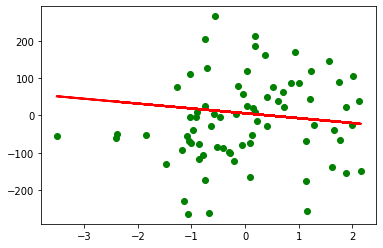

In [ ]:
r2Score('x1')

R^2 score: 0.47295850686125307


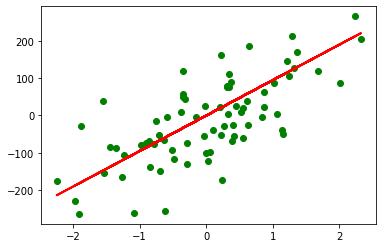

In [ ]:
r2Score('x2')

R^2 score: 0.09100607514204895


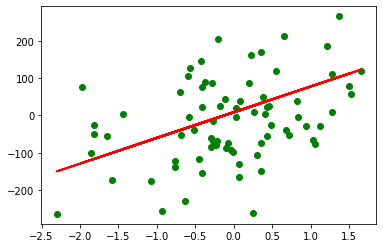

In [ ]:
r2Score('x3')

R^2 score: 0.16573074846918812


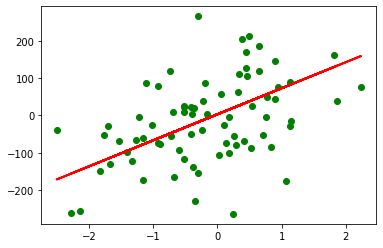

In [ ]:
r2Score('x4')

**Задание 6**

Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_train_pred=reg.predict(x_train)

In [ ]:
print(reg.coef_)

[[ 4.61862492 87.09715006 58.01566891 70.32311696]]


In [ ]:
print(reg.intercept_)

[0.27367091]


In [ ]:
y_pred=reg.predict(x_test)

In [ ]:
reg.score(x_test, y_pred)

1.0

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(x_train)
X_train_scaled = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(x_test)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [ ]:
reg.fit(X_train_scaled,y_train)

y_pred = reg.predict(X_test_scaled)

mse1 = metrics.mean_squared_error(y_test, y_pred)

print("MSE после: {}".format(mse1))

MSE после: 528.325306515044
